# Michael J Moore: Exploratory Data Analysis of Penguins Dataset
**Date:** October 3, 2025  

---

This notebook is part of **Project 6 (EDA)**.  
The purpose is to demonstrate skills in **data analysis and storytelling** using Python, pandas, Seaborn, and Matplotlib.  

Dataset: `penguins.csv` (Palmer Penguins dataset)  

## Import Dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## Data Analysis
### Step 1. Data Acquisition

In [6]:
# Load the penguins dataset from the data folder
df = pd.read_csv("data/penguins.csv")

# Inspect the first rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Step 2. Initial Data Inspection

In [7]:
# View first 10 rows
print(df.head(10))

# Shape of dataset
print("Shape:", df.shape)

# Data types
print(df.dtypes)

# Info summary
df.info()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       36

### Step 3. Initial Descriptive Statistics

In [8]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Step 4. Initial Data Distribution for Numerical Columns


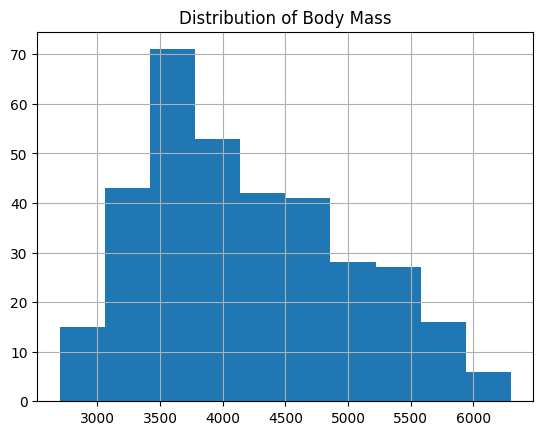

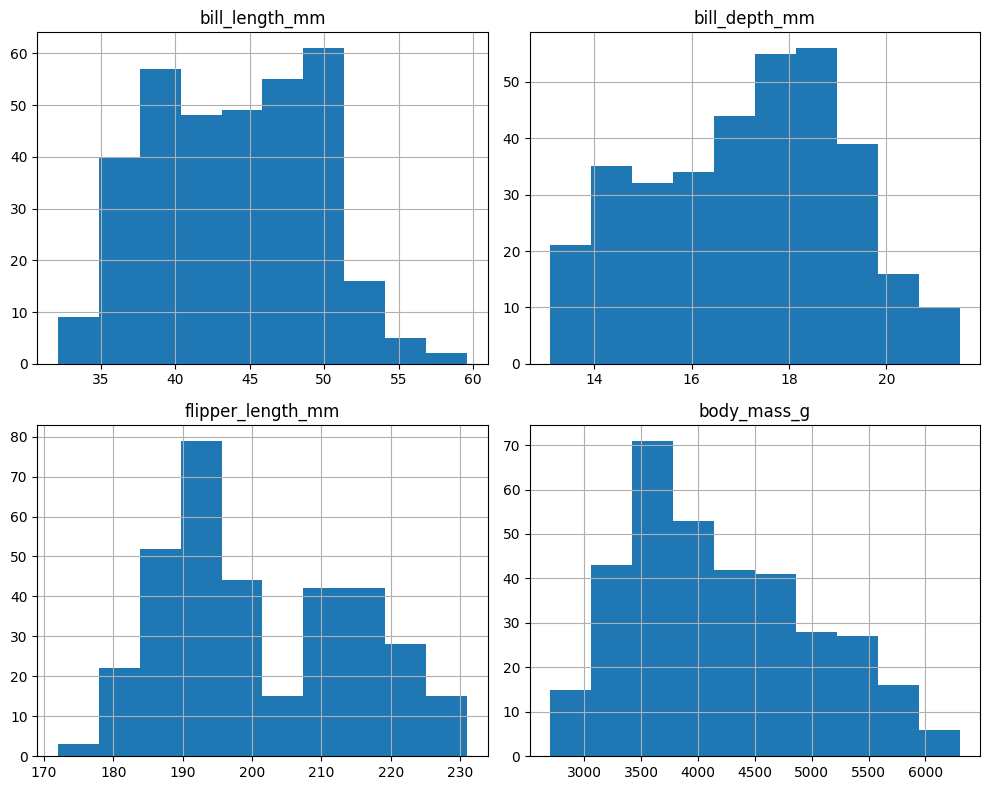

In [9]:
# Histogram of one column
df['body_mass_g'].hist()
plt.title("Distribution of Body Mass")
plt.show()

# Histograms for all numerical columns
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

### Step 5. Initial Data Distribution for Categorical Columns

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


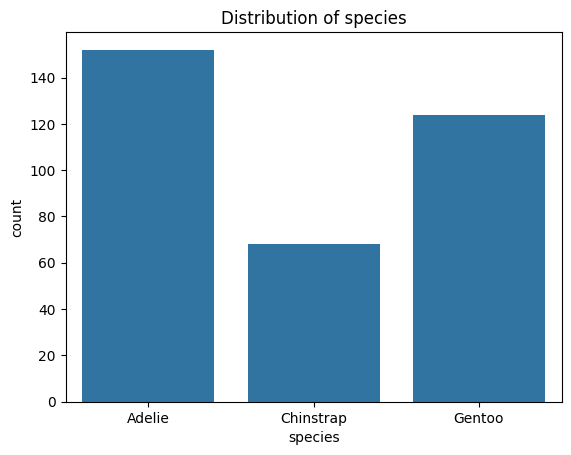

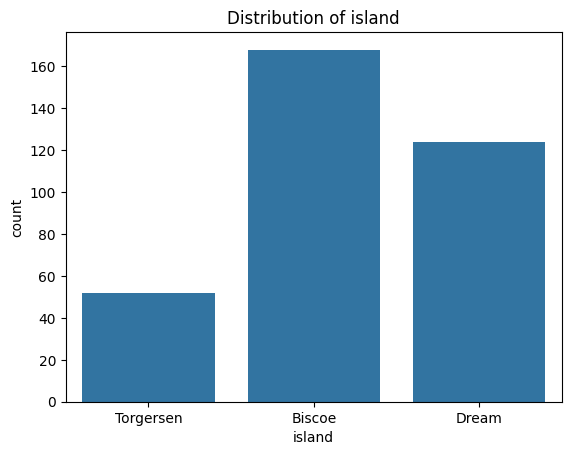

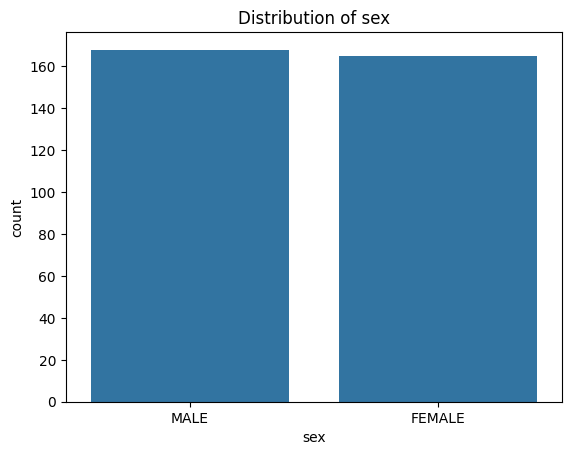

In [11]:
# Value counts of one categorical column
print(df['species'].value_counts())

# Count plots for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

### Step 6. Initial Data Transformation and Feature Engineering

In [12]:
# Rename a column
df.rename(columns={'body_mass_g': 'body_mass_grams'}, inplace=True)

# Add a new column: bill ratio
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_grams,sex,bill_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2.238889
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.901554


### Step 7. Initial Visualizations

#### Compare body mass across species

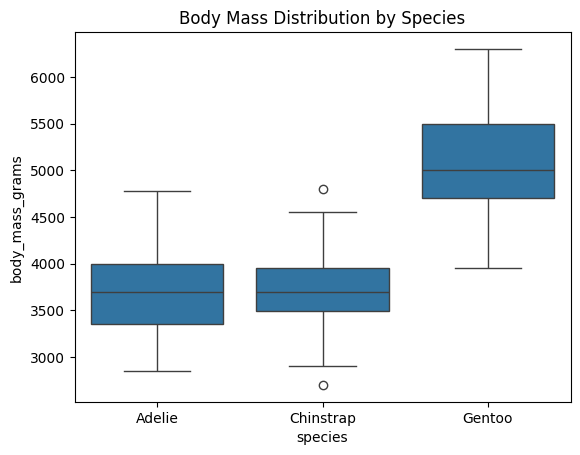

In [13]:
sns.boxplot(x="species", y="body_mass_grams", data=df)
plt.title("Body Mass Distribution by Species")
plt.show()

#### Explore relationship between flipper length and body mass

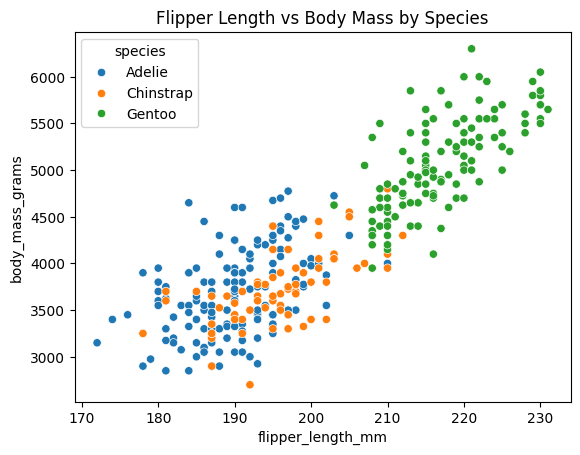

In [14]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_grams", hue="species", data=df)
plt.title("Flipper Length vs Body Mass by Species")
plt.show()

#### Explore correlation across all numerical features

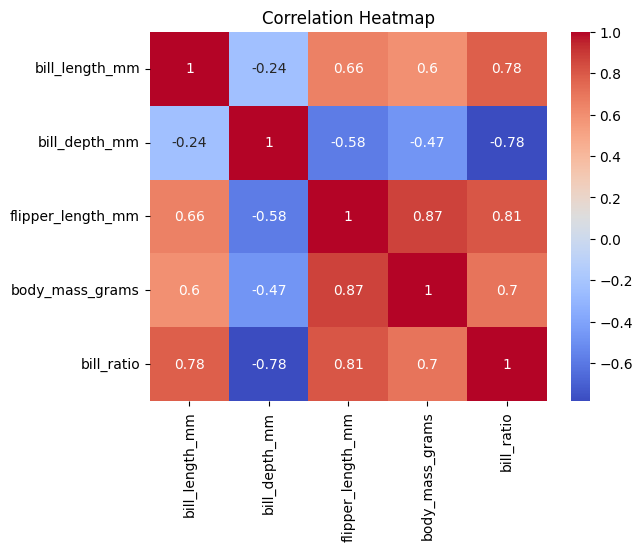

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Insights and Storytelling
- Gentoo penguins are generally larger (heavier, longer flippers).  
- Adelie penguins are the smallest across most measurements.  
- Body mass is closely tied to flipper length, suggesting a biological relationship.  
- The dataset is well-structured, and categorical distributions reflect realistic population differences across islands.  

## Conclusion
This notebook demonstrated an **Exploratory Data Analysis (EDA)** workflow:
1. Imported data and libraries  
2. Performed inspection, descriptive statistics, and visualization  
3. Applied transformations and feature engineering  
4. Communicated findings through charts and narrative  

This EDA practice reinforces skills in **pandas, Seaborn, Matplotlib, and data storytelling**.